In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# Any results you write to the current directory are saved as output.

In [2]:
#reading the number of classes from meta file
meta_data = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Meta.csv')

In [3]:
meta_shape = meta_data.shape
no_classes = meta_shape[0]

In [4]:
# Resizing all images and converting then to numpy array and adding labels
#let's convert then to 40x40 size
#the images are in RGB format. so the number od channels for each image is 3
#the 
import cv2
train_data=[]
train_labels=[]

side = 20
channels = 3


for c in range(no_classes) :
    path = "../input/gtsrb-german-traffic-sign/train/{0}/".format(c)
    files = os.listdir(path)
    for file in files:
        train_image = cv2.imread(path+file)
        image_resized = cv2.resize(train_image, (side, side), interpolation = cv2.INTER_AREA)
        train_data.append(np.array(image_resized))
        train_labels.append(c)

In [5]:
data = np.array(train_data)
data = data.reshape((data.shape[0], 20*20*3))
data_scaled = data.astype(float)/255
labels = np.array(train_labels)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_scaled, labels, test_size=0.25, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
y_pred = model.predict(X_val)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        44
           1       0.85      0.90      0.87       594
           2       0.83      0.88      0.85       560
           3       0.73      0.79      0.76       348
           4       0.83      0.84      0.83       529
           5       0.70      0.85      0.76       462
           6       0.90      0.96      0.93        81
           7       0.71      0.84      0.77       336
           8       0.82      0.85      0.84       385
           9       0.93      0.89      0.91       359
          10       0.88      0.88      0.88       461
          11       0.87      0.84      0.85       291
          12       0.97      0.89      0.93       548
          13       0.94      0.94      0.94       549
          14       0.99      0.83      0.91       197
          15       0.91      0.76      0.83       152
          16       0.94      0.96      0.95       108
          17       0.96    

In [9]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred, y_val))

0.8676935631949403


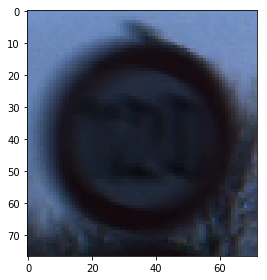

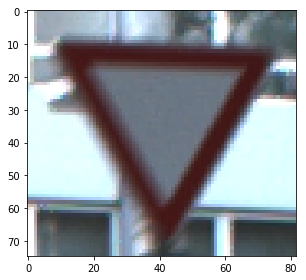

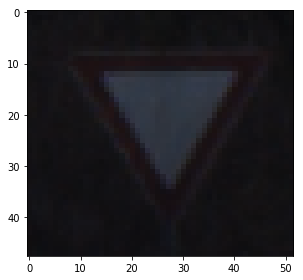

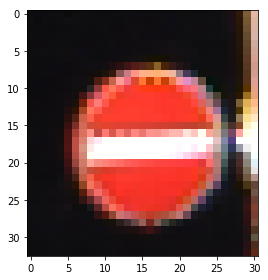

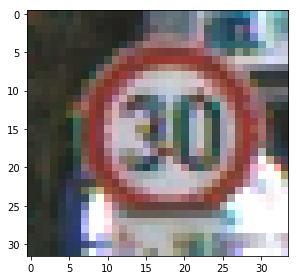

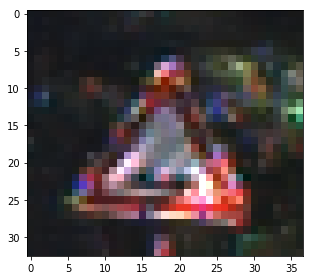

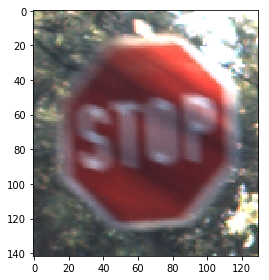

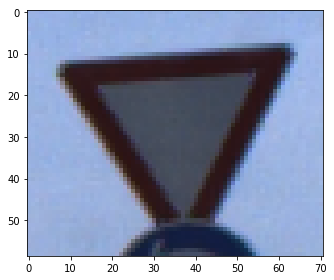

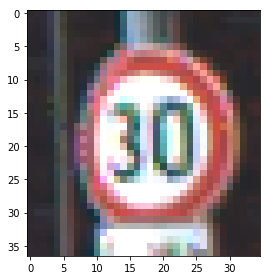

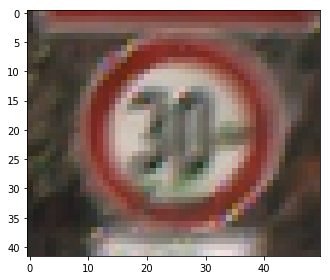

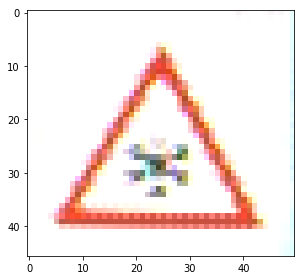

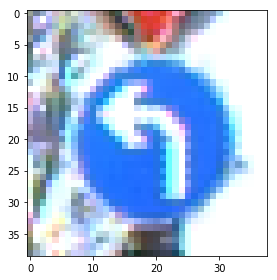

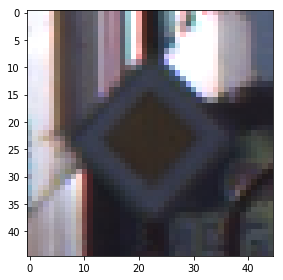

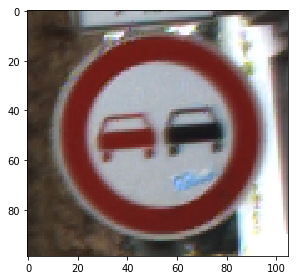

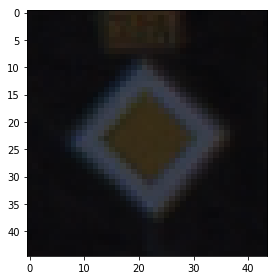

In [10]:
#now predicting the model with the test data:
from pylab import *
from skimage import io
test_path = "../input/gtsrb-german-traffic-sign/test/"
test_files = os.listdir(test_path)
for i in range(15):
    img = io.imread(test_path+test_files[i])
    figure(i)
    io.imshow(img)

In [11]:
from PIL import Image
y_test=pd.read_csv("../input/gtsrb-german-traffic-sign/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('../input/gtsrb-german-traffic-sign/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((20, 20))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255
X_test = X_test.reshape((X_test.shape[0], 20*20*3))
pred = model.predict(X_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
print(metrics.accuracy_score(pred, y_test)) 

0.3926365795724466


In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.18      0.33      0.24        60
           1       0.33      0.34      0.34       720
           2       0.27      0.29      0.28       750
           3       0.13      0.20      0.16       450
           4       0.31      0.36      0.33       660
           5       0.20      0.36      0.26       630
           6       0.44      0.33      0.37       150
           7       0.20      0.31      0.24       450
           8       0.27      0.28      0.27       450
           9       0.51      0.30      0.38       480
          10       0.53      0.58      0.56       660
          11       0.51      0.30      0.38       420
          12       0.68      0.53      0.59       690
          13       0.86      0.87      0.86       720
          14       0.92      0.33      0.49       270
          15       0.33      0.20      0.25       210
          16       0.56      0.68      0.61       150
          17       0.96    

original:  16  predicted:  16
original:  1  predicted:  4
original:  38  predicted:  36
original:  33  predicted:  13
original:  11  predicted:  11
original:  38  predicted:  38
original:  18  predicted:  18
original:  12  predicted:  5
original:  25  predicted:  25
original:  35  predicted:  35
original:  12  predicted:  12
original:  7  predicted:  8
original:  23  predicted:  31
original:  7  predicted:  5
original:  4  predicted:  1


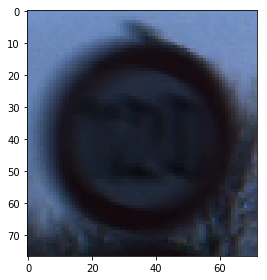

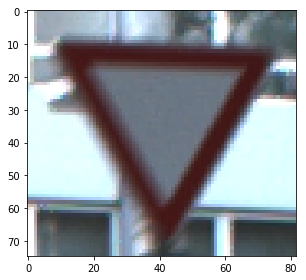

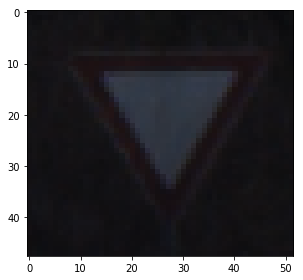

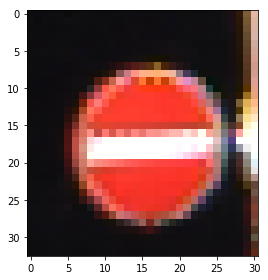

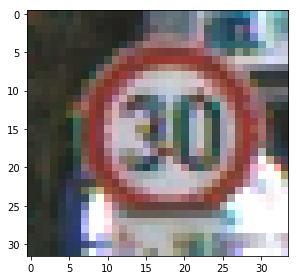

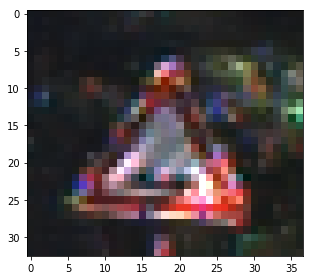

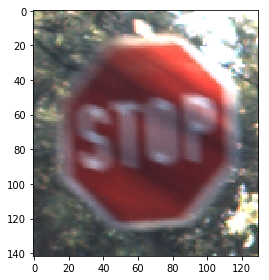

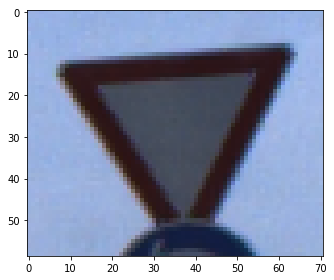

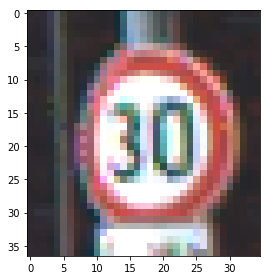

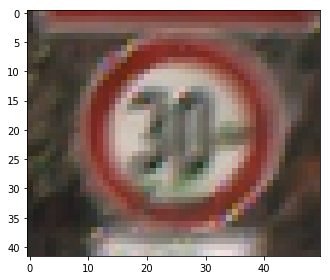

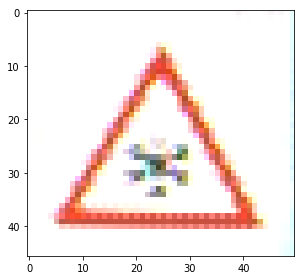

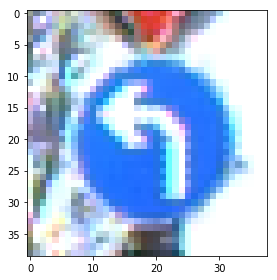

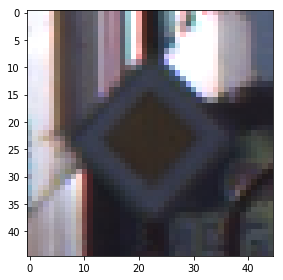

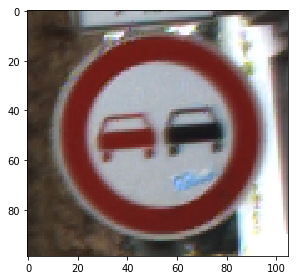

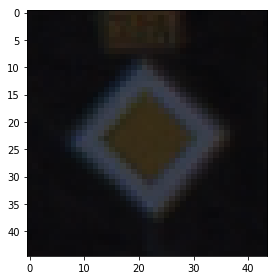

In [14]:
test_path = "../input/gtsrb-german-traffic-sign/test/"
test_files = os.listdir(test_path)
for i in range(15):
    img = io.imread(test_path+test_files[i])
    figure(i)
    io.imshow(img)
    print('original: ', y_test[i], ' predicted: ', pred[i])